In [1]:
#Comenzamos importando las librerías necesarias
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Leemos el archivo
filename = "../data/Base.csv"
data = pd.read_csv(filename)

In [3]:
data.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,0,200.0,0,INTERNET,6.987316,linux,1,1,0,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,0,200.0,0,INTERNET,28.199923,x11,1,1,0,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,1,200.0,0,INTERNET,11.234264,other,1,1,0,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,...,0,200.0,0,INTERNET,5.329387,other,1,1,0,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,0,1500.0,0,INTERNET,4.103970,other,1,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [5]:
#No hay ningún valor nulo en el dataset
data.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [6]:
data.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [8]:
print("Datos duplicados:",data.duplicated().sum())

Datos duplicados: 0


In [9]:
data['device_fraud_count'].value_counts()

device_fraud_count
0    1000000
Name: count, dtype: int64

In [17]:
data = data.drop(['device_fraud_count'],axis=1)
data.shape

(1000000, 31)

In [18]:
n_fraude = pd.DataFrame(data['fraud_bool'].value_counts())
n_fraude

,count
fraud_bool,
0,988971
1,11029


In [19]:
Y = data['fraud_bool']

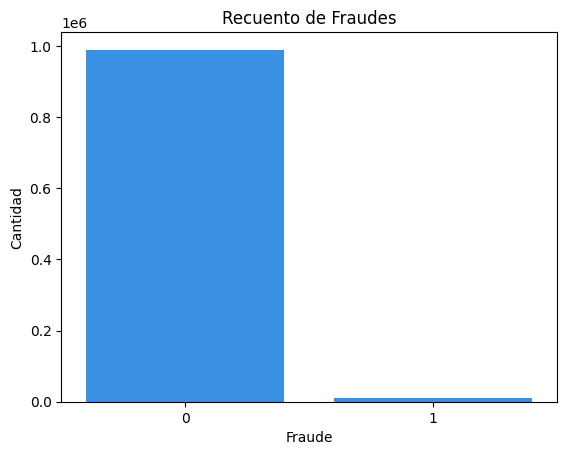

In [20]:
sns.countplot(x=Y,color='dodgerblue')

# Personalizar el gráfico (opcional)
plt.title("Recuento de Fraudes")
plt.xlabel("Fraude")
plt.ylabel("Cantidad")

# Mostrar el gráfico
plt.show()

In [21]:
def hist_plot(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(df.columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_cols = 3
    num_rows = (num_columns // num_cols)-1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))
    j = 0
    for i, column in enumerate(df.columns):
        l = i-j
        if df[column].dtype != 'object':  # Verifica si la columna no es de tipo 'object'
            row, col = divmod(l, num_cols)
            sns.histplot(df[column], ax=axes[row, col],color='olive')
        else:
            j = j+1
    plt.tight_layout()
    plt.show()

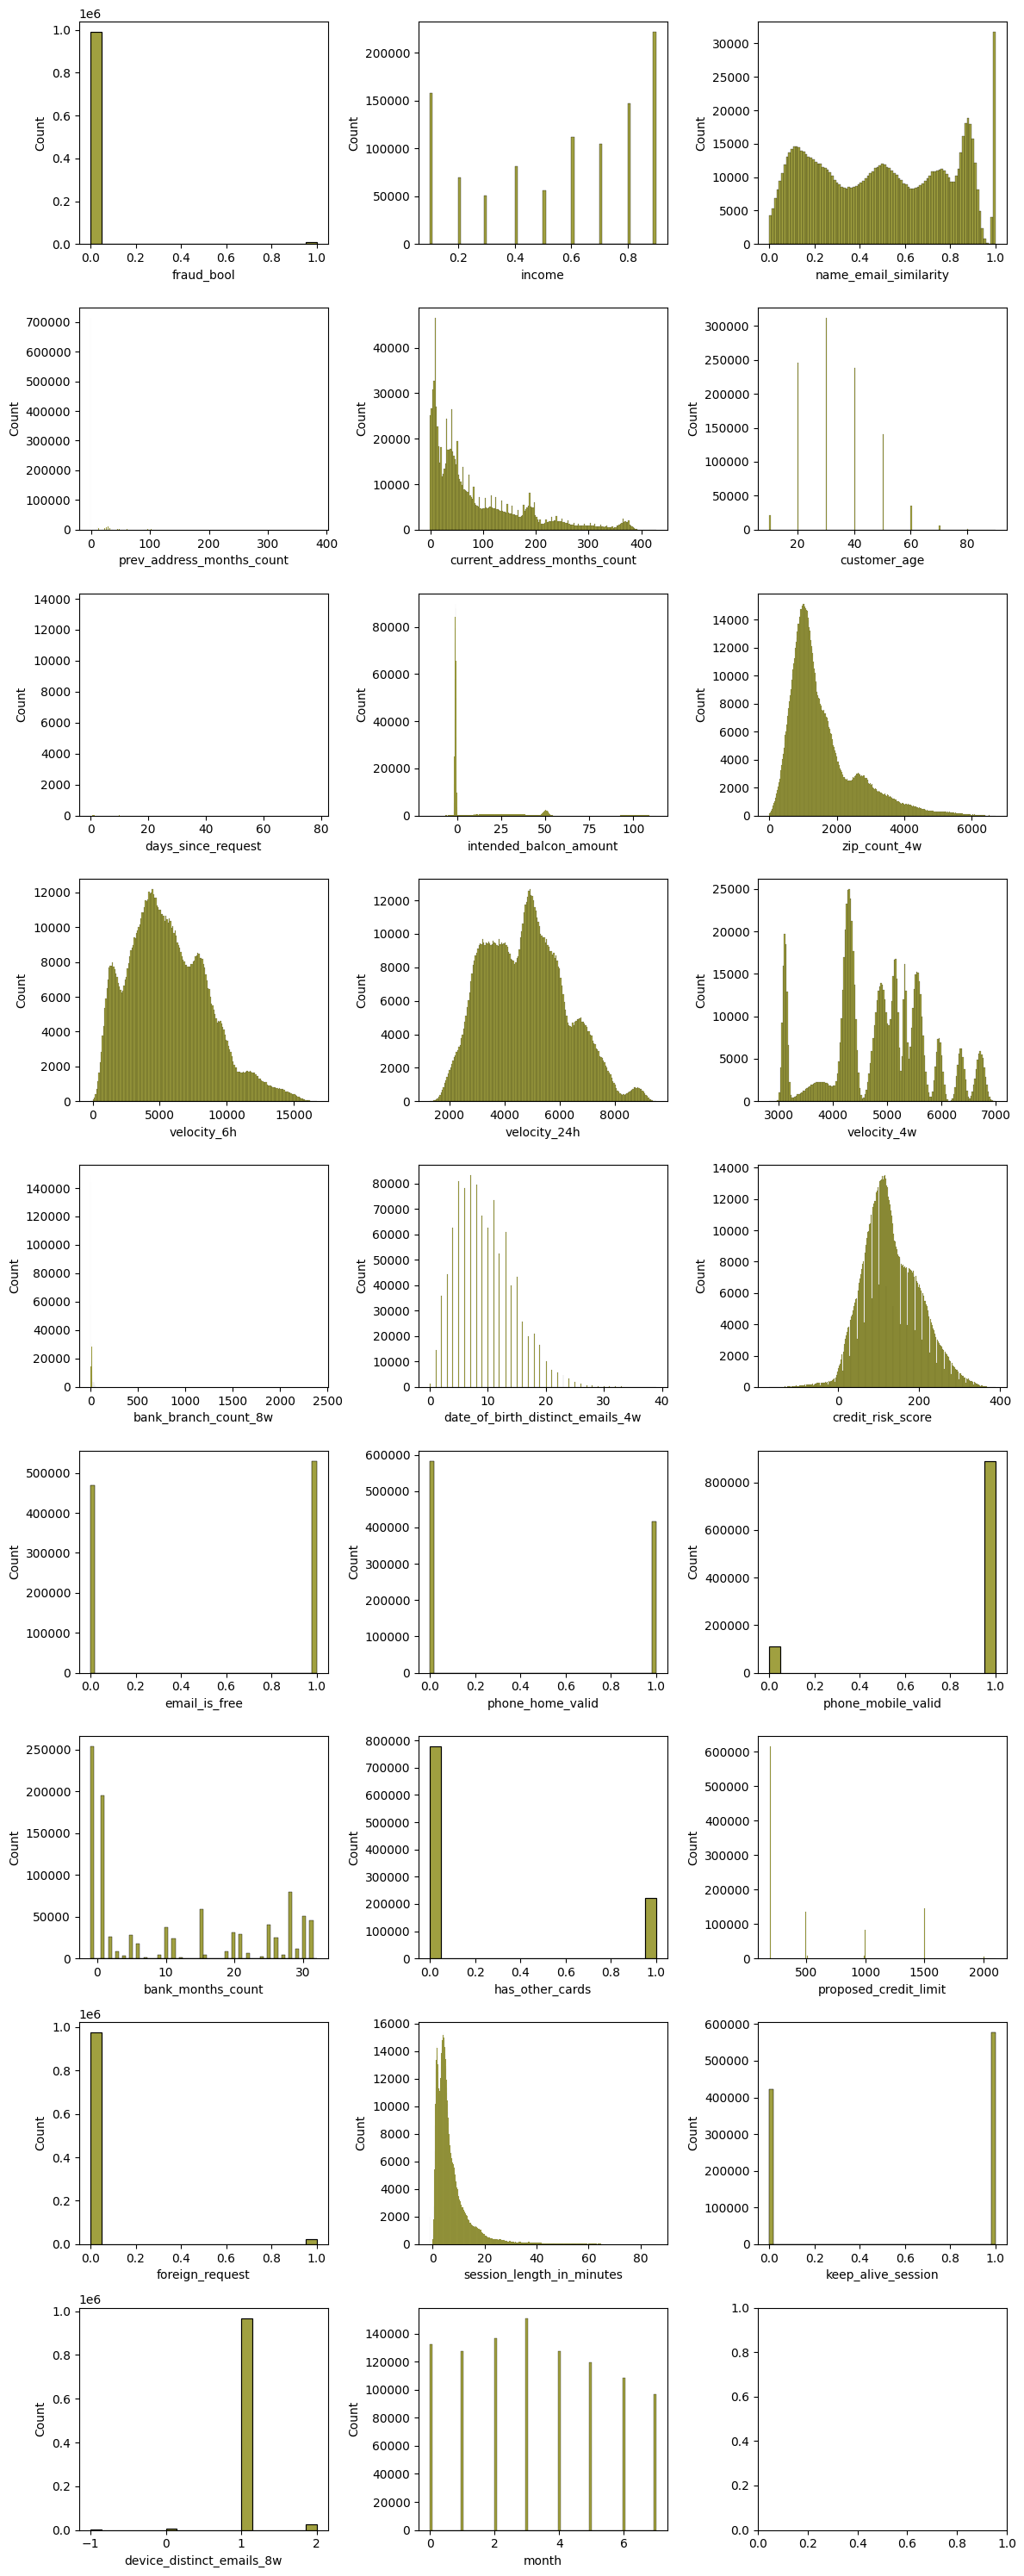

In [22]:
hist_plot(data)

In [23]:
def kde_plot(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(df.columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_cols = 3
    num_rows = (num_columns // num_cols)-1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))
    j = 0
    for i, column in enumerate(df.columns):
        l = i-j
        if df[column].dtype != 'object':  # Verifica si la columna no es de tipo 'object'
            row, col = divmod(l, num_cols)
            sns.kdeplot(df[column], ax=axes[row, col],color='olive')
        else:
            j = j+1
    plt.tight_layout()
    plt.show()

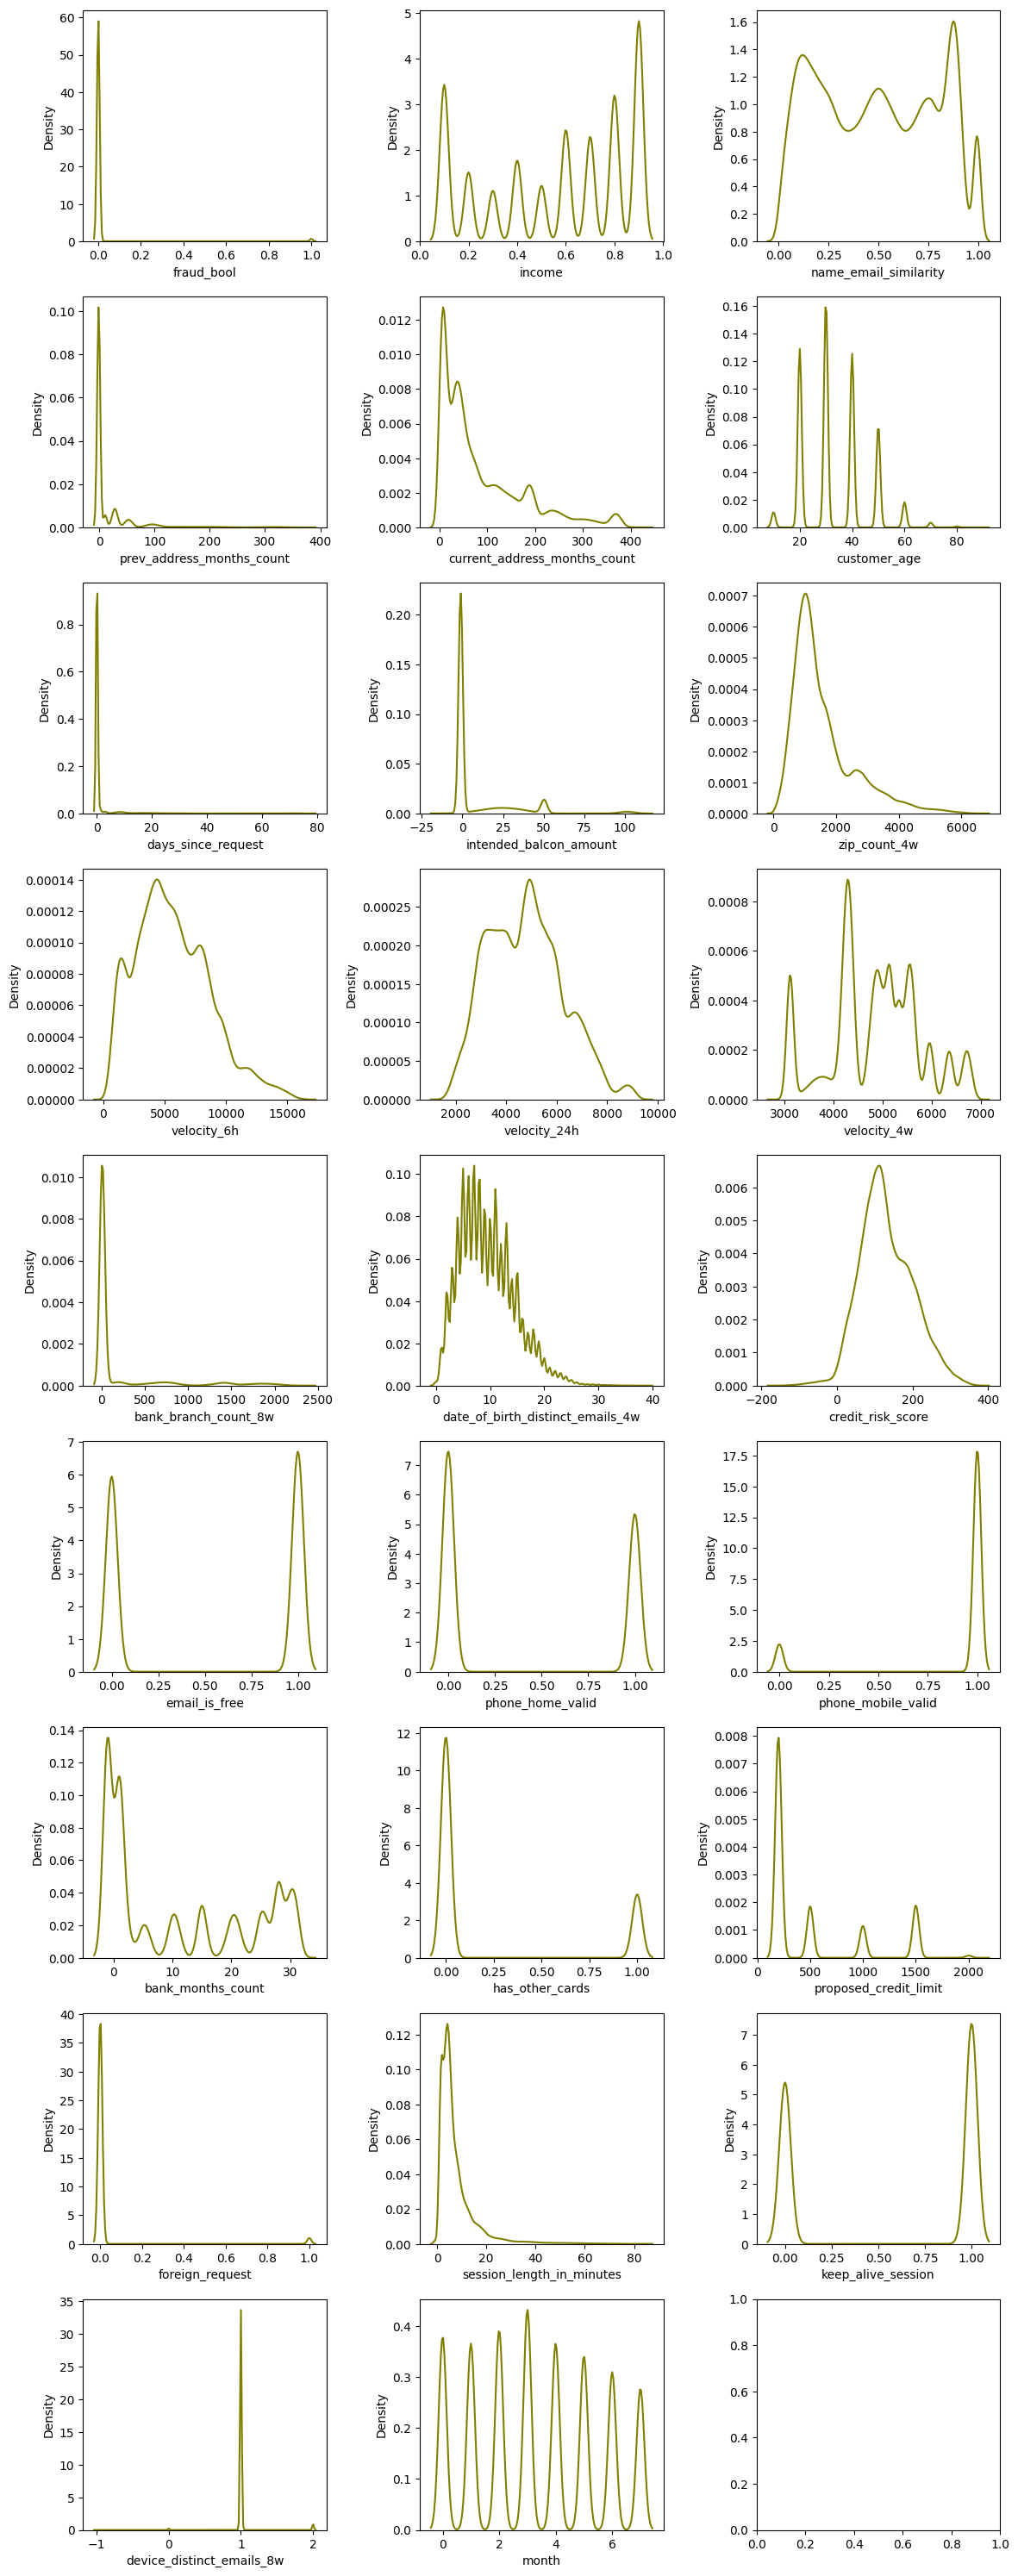

In [24]:
kde_plot(data)

In [25]:
def box_plot(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(df.columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_cols = 3
    num_rows = (num_columns // num_cols)-1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 30))
    j = 0
    for i, column in enumerate(df.columns):
        l = i-j
        if df[column].dtype != 'object':  # Verifica si la columna no es de tipo 'object'
            row, col = divmod(l, num_cols)
            sns.boxplot(df[column], ax=axes[row, col],color='olive')
        else:
            j = j+1
    plt.tight_layout()
    plt.show()

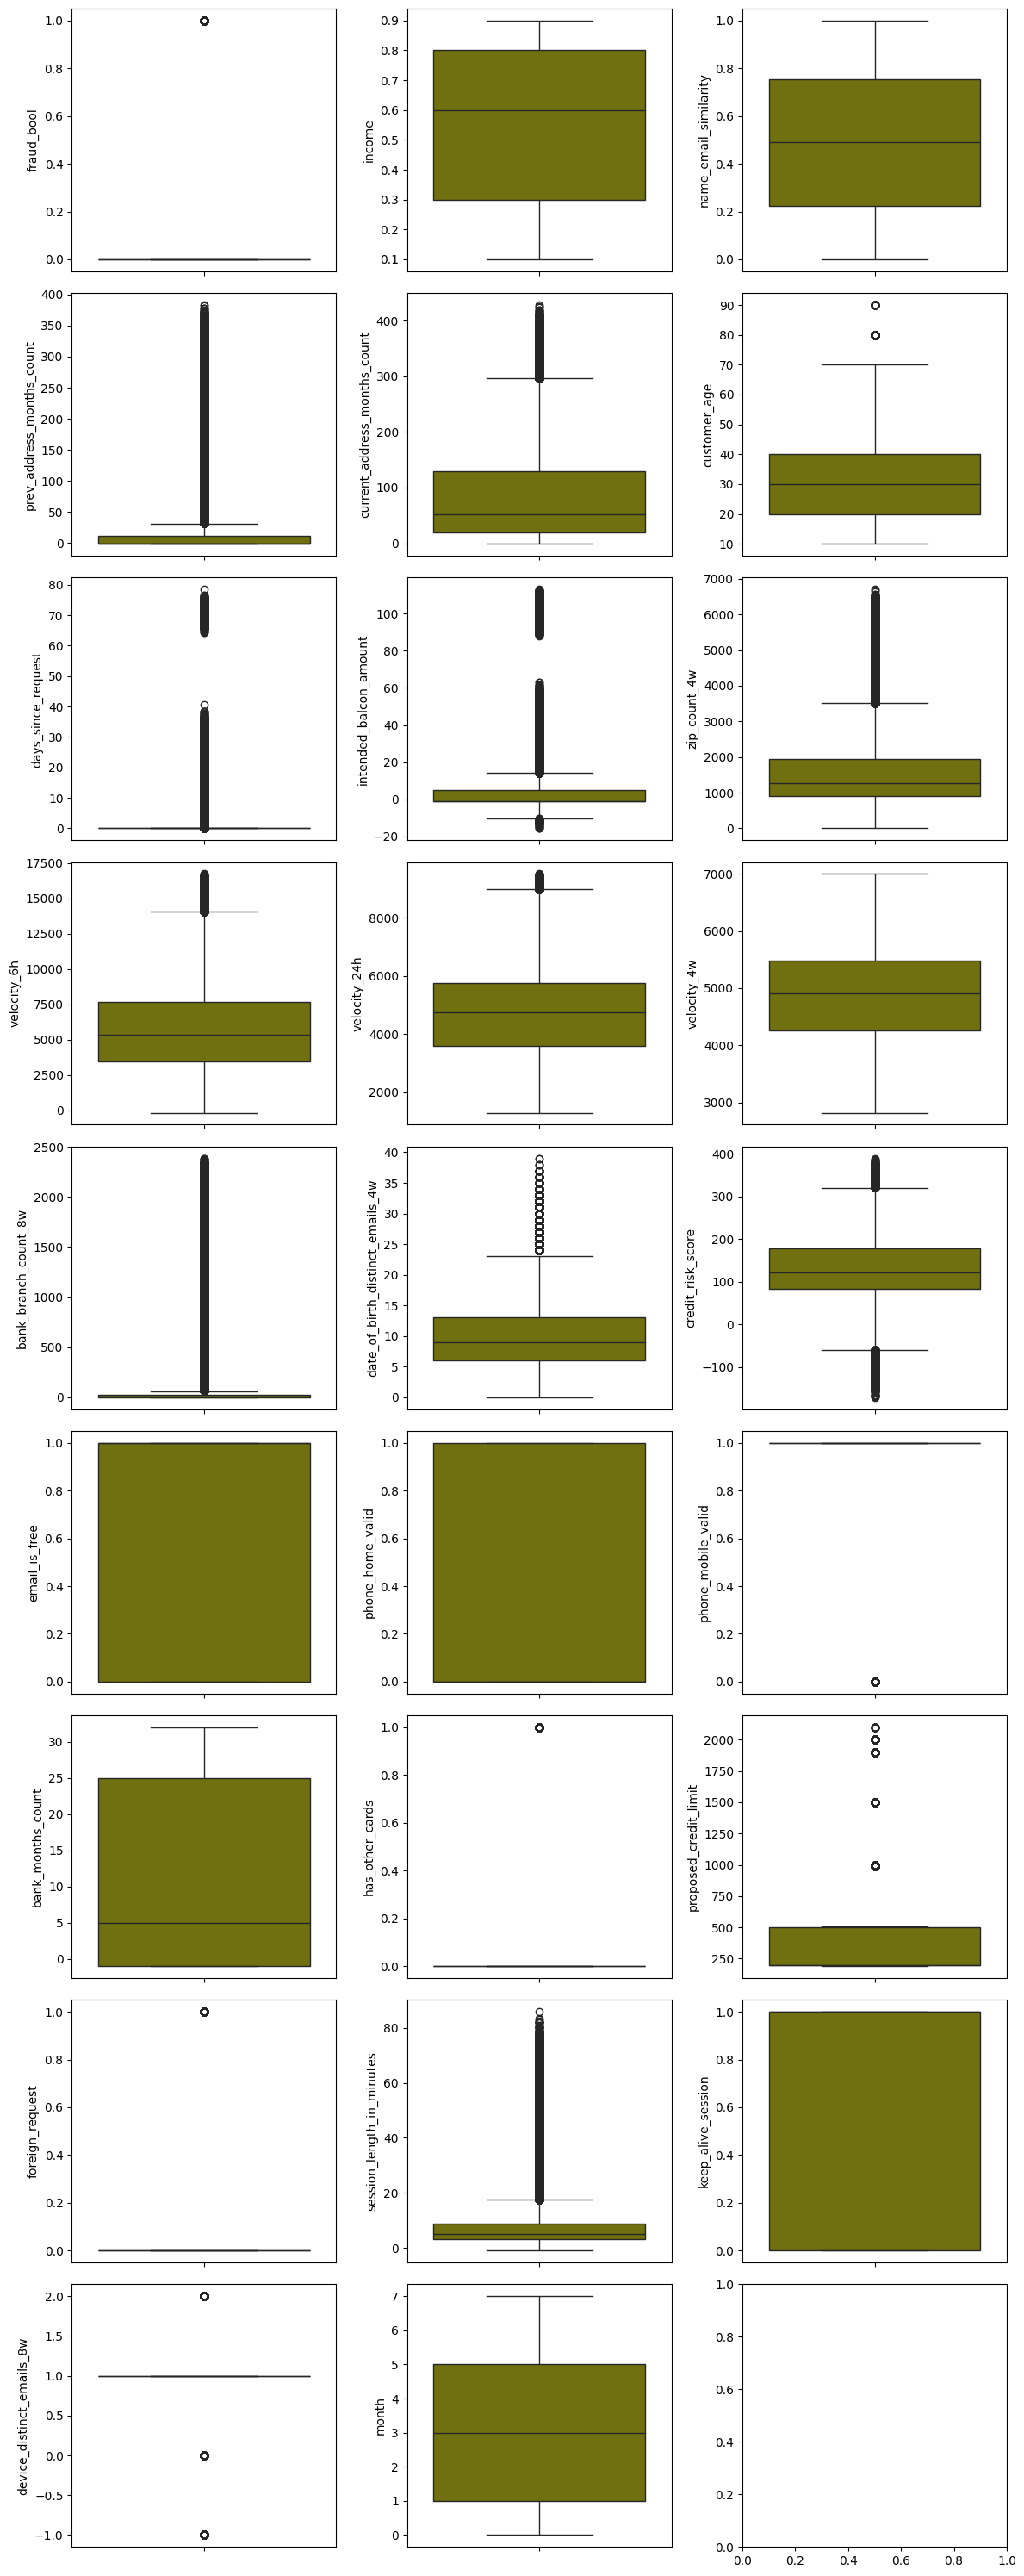

In [26]:
box_plot(data)

In [37]:
def plot_categorical_columns(df):

    categorical_columns = df.select_dtypes(include=['object']).columns
    num_columns = len(categorical_columns)
    # Divide el número de columnas por 2 para mostrar en 2 filas
    num_rows = 2
    num_cols = (num_columns // num_rows)+1
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

    for i, column in enumerate(categorical_columns):
        row, col = divmod(i, num_cols)
        sns.countplot(x=column, data=df, ax=axes[row, col],color='salmon')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Recuento')
        axes[row, col].set_title(f'Recuento de {column}')
        
    
    plt.tight_layout()
    plt.show()

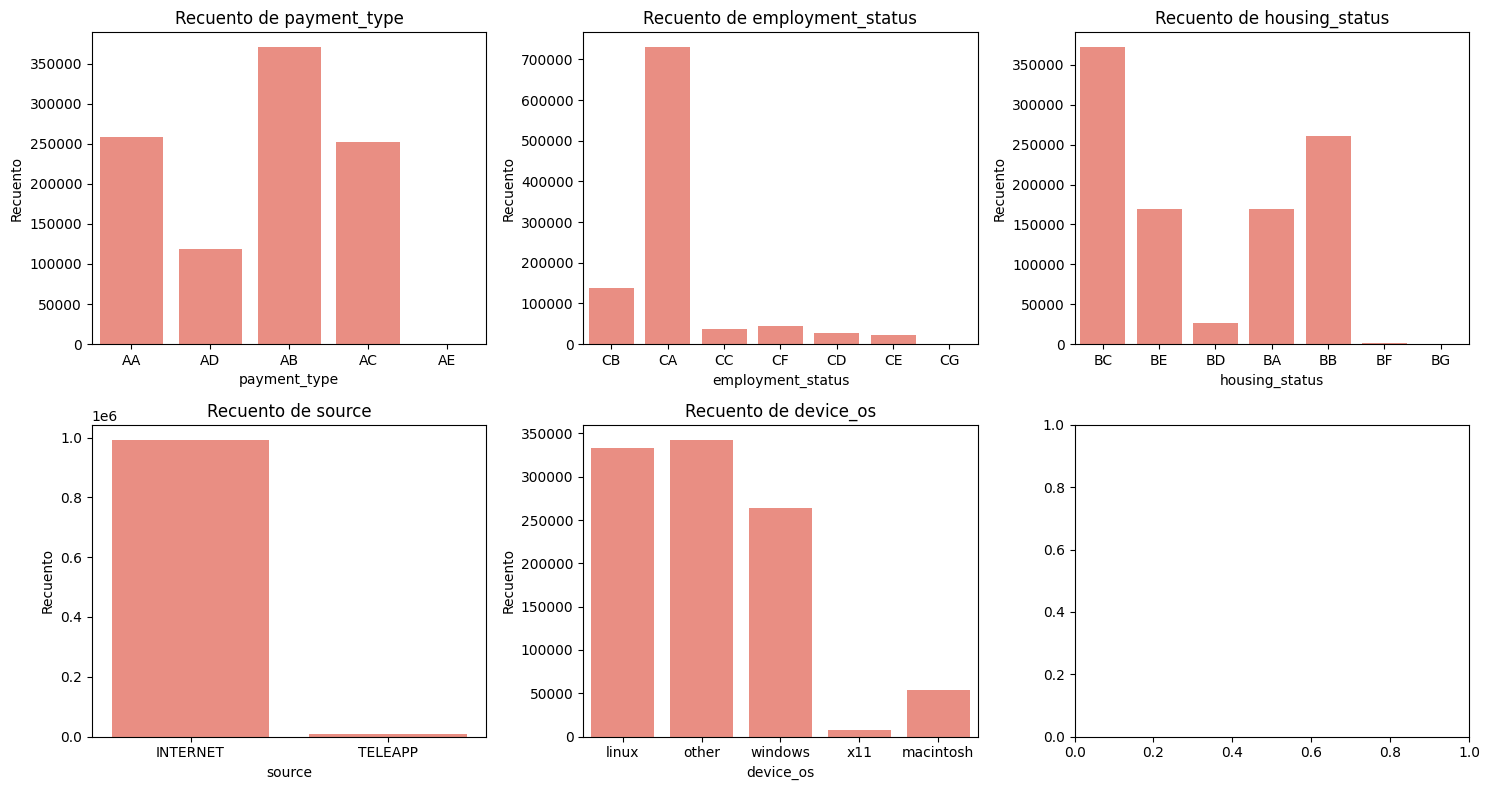

In [38]:
plot_categorical_columns(data)

In [29]:
a = data[data['fraud_bool']==1]
a

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
43,1,0.9,0.570800,-1,157,60,0.005908,35.337538,AA,4079,...,30,0,1500.0,0,INTERNET,4.036394,windows,1,1,0
140,1,0.1,0.993219,-1,67,20,0.015331,92.120139,AA,1192,...,25,0,1500.0,0,INTERNET,12.928072,windows,0,1,0
284,1,0.8,0.794351,-1,376,60,17.925951,41.422110,AA,815,...,28,0,1500.0,0,INTERNET,2.550167,linux,0,1,0
314,1,0.7,0.090000,-1,58,50,0.004134,-1.244047,AD,4011,...,27,0,1500.0,0,INTERNET,3.500856,windows,0,1,0
561,1,0.9,0.998248,31,45,30,0.010165,33.067538,AA,525,...,1,1,2000.0,0,INTERNET,44.536211,windows,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999862,1,0.3,0.346834,-1,13,20,0.007084,-0.994025,AC,692,...,-1,0,200.0,0,INTERNET,23.525141,windows,1,1,7
999879,1,0.7,0.161950,289,209,40,0.008195,-0.837462,AC,679,...,-1,0,2000.0,0,INTERNET,9.366778,windows,0,1,7
999923,1,0.4,0.098119,-1,139,30,0.028858,-1.383748,AB,345,...,1,0,500.0,0,INTERNET,2.363665,windows,0,1,7
999938,1,0.8,0.830047,-1,73,40,0.009757,-1.439571,AC,623,...,-1,0,1900.0,0,INTERNET,1.596140,linux,0,1,7


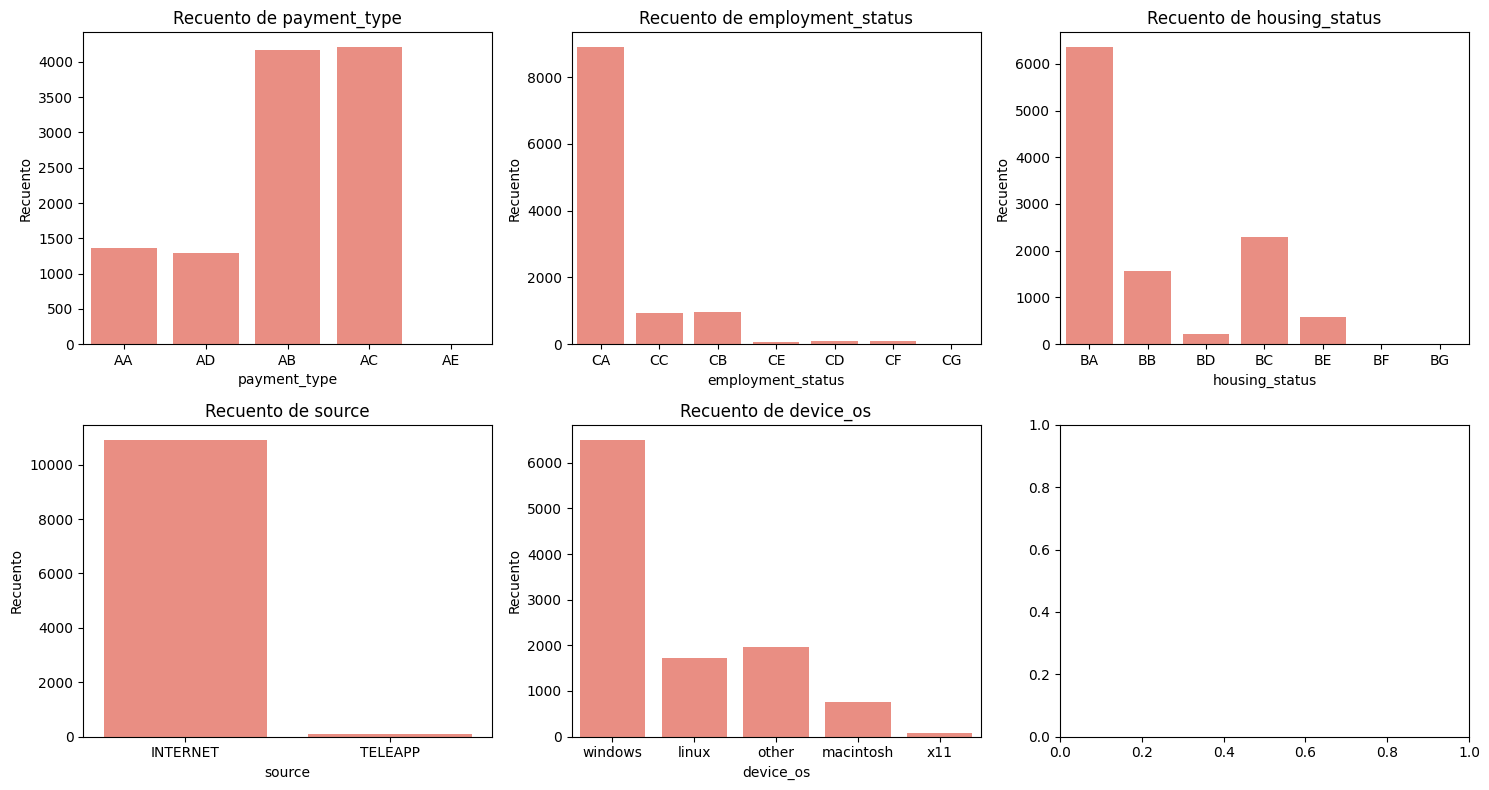

In [39]:
plot_categorical_columns(a)

In [40]:
#Para ver la matriz de correlación vamos a quitar las variables tipo objeto
# Lista de columnas a eliminar
columnas_a_eliminar = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

# Creo un nuevo dataFrame con las columnas eliminadas
data_sin_object = data.drop(columns=columnas_a_eliminar)

# Verifico el DataFrame después de eliminar las columnas
data_sin_object.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,0,1,9,0,1500.0,0,16.224843,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,1,1,2,0,1500.0,0,3.363854,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,0,1,30,0,200.0,0,22.730559,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,0,1,1,0,200.0,0,15.215816,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,1,1,26,0,200.0,0,3.743048,0,1,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,1204,11556.955514,...,1,1,30,0,200.0,0,6.987316,1,1,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,1998,11723.993606,...,1,1,1,0,200.0,0,28.199923,1,1,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,1548,4999.555801,...,1,1,25,1,200.0,0,11.234264,1,1,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,1781,6979.994002,...,1,0,2,0,200.0,0,5.329387,1,1,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,3113,7549.992086,...,1,1,15,0,1500.0,0,4.103970,1,1,0


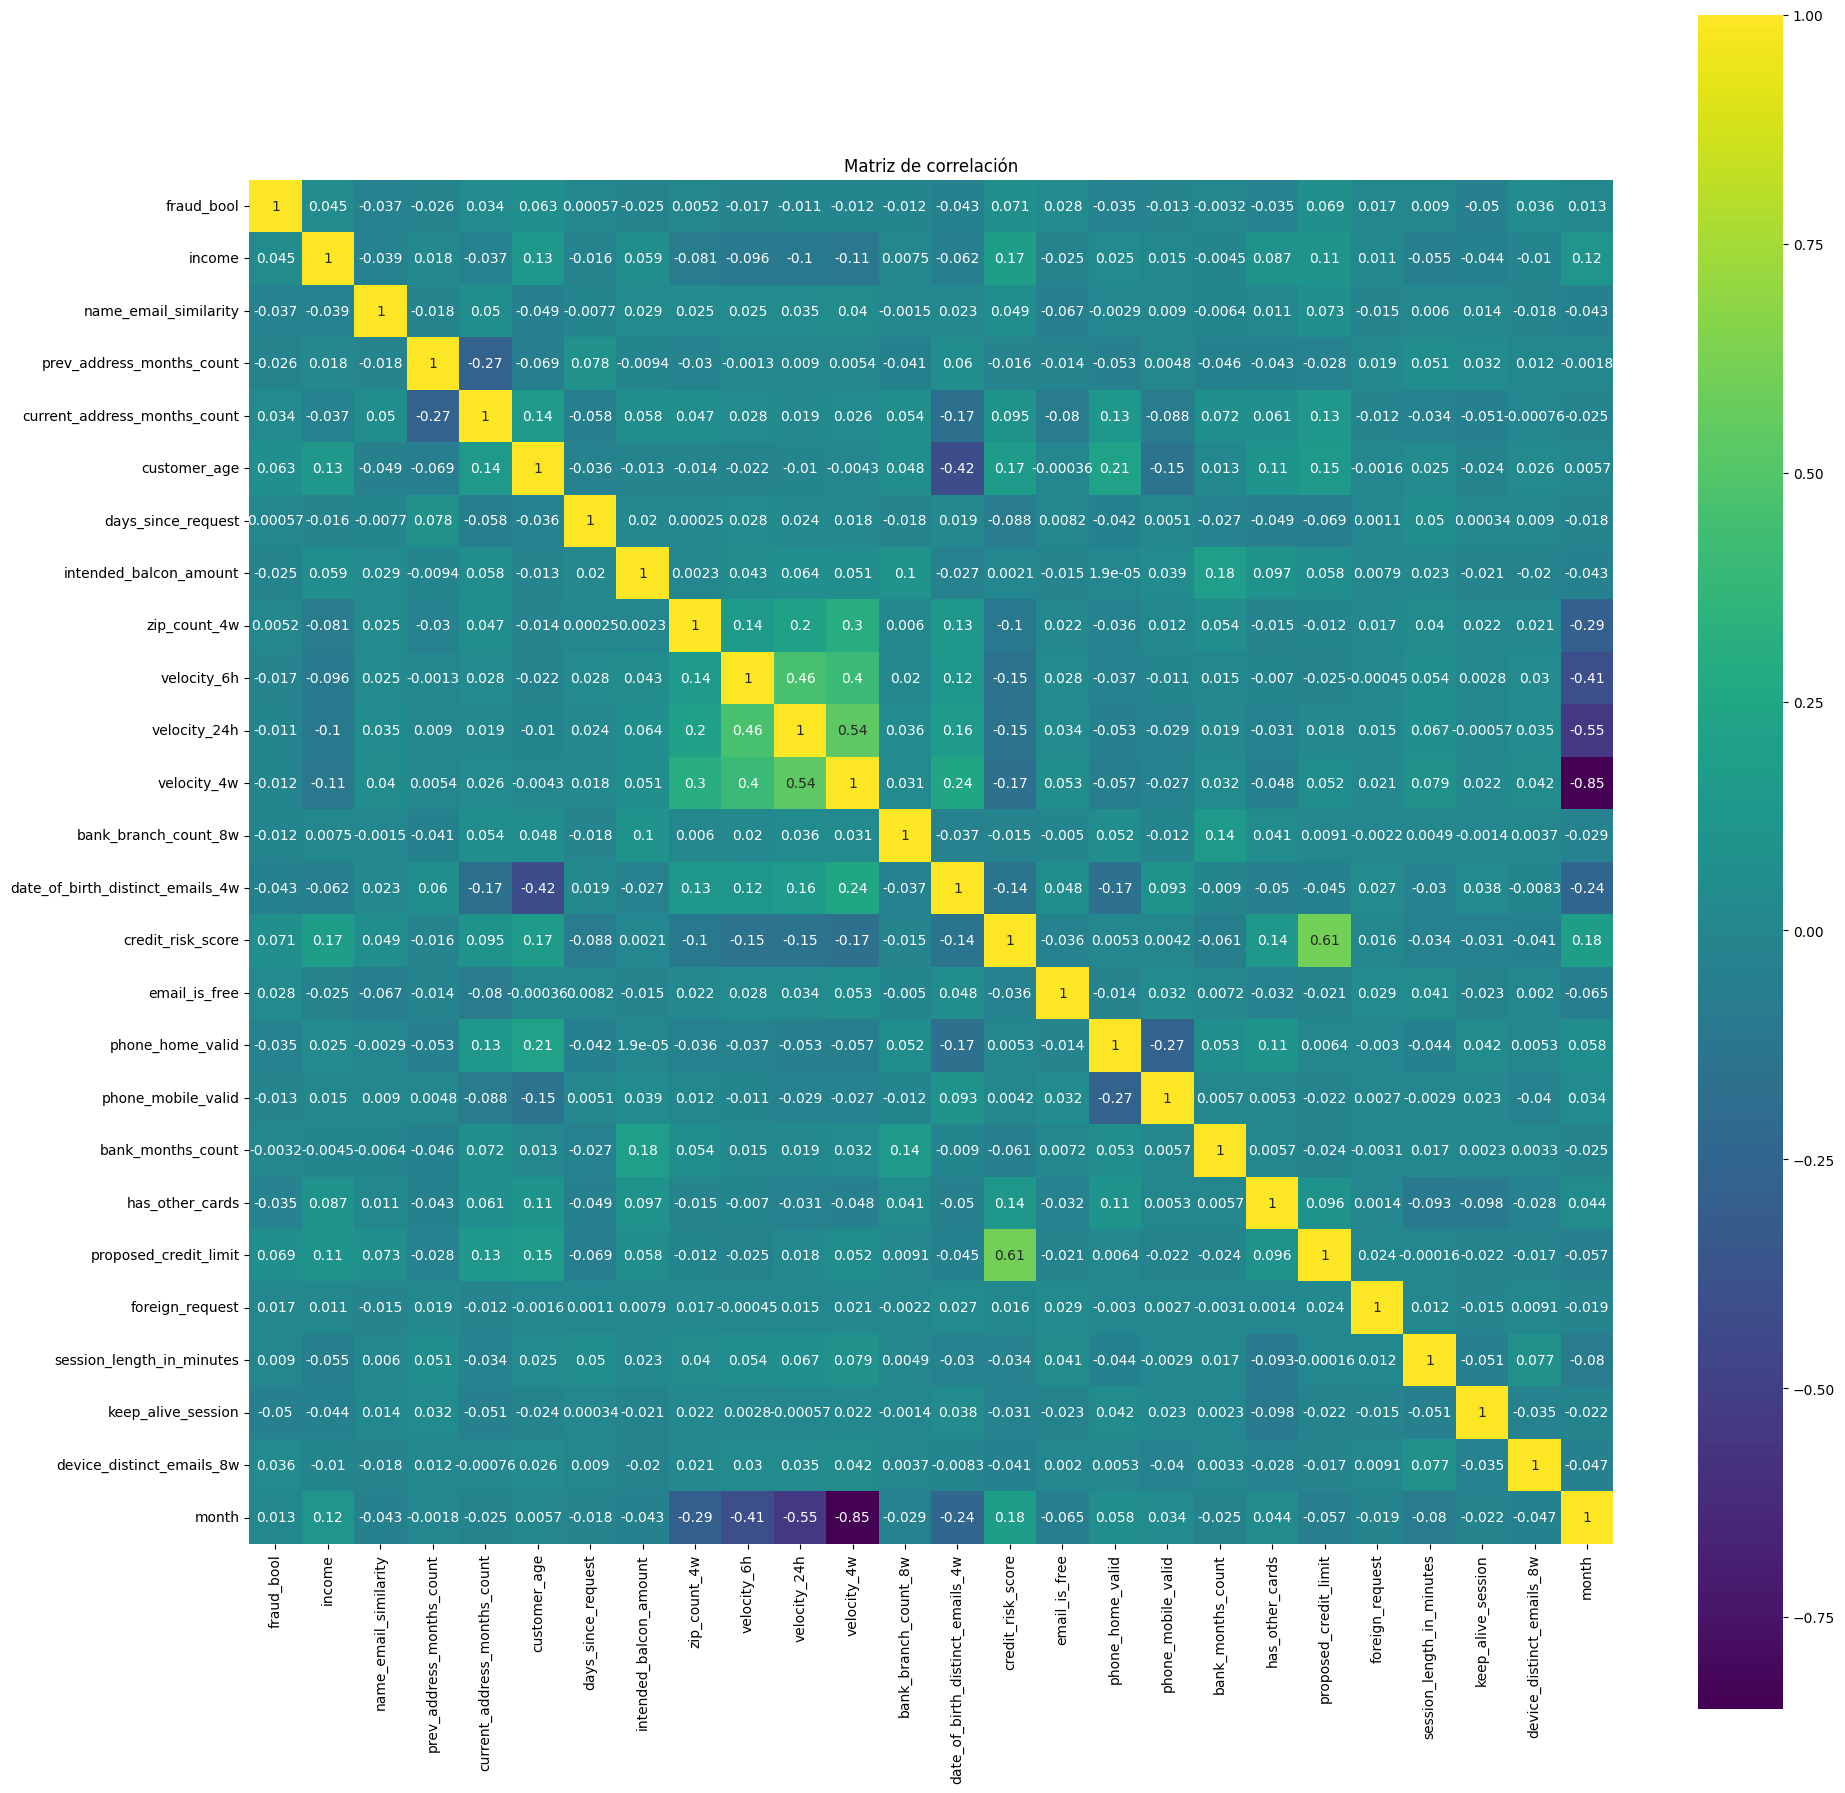

In [41]:
%matplotlib inline
#Matriz de corelacion matplotlib
correlation = data_sin_object.corr()
plt.figure(figsize=(22,22))
ax = sns.heatmap(correlation,vmin=-0.85, vmax=1,square=True,annot=True,cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

In [42]:
correlation


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
fraud_bool,1.000000,0.045079,-0.036720,-0.026031,0.033701,0.062959,0.000567,-0.024524,0.005212,-0.016892,...,-0.035128,-0.013180,-0.003222,-0.035156,0.068907,0.016885,0.008999,-0.050296,0.035704,0.013250
income,0.045079,1.000000,-0.038519,0.018209,-0.036985,0.125822,-0.015877,0.059046,-0.080581,-0.096431,...,0.024938,0.014979,-0.004514,0.086861,0.108868,0.011452,-0.055430,-0.043584,-0.009992,0.116479
name_email_similarity,-0.036720,-0.038519,1.000000,-0.018186,0.050305,-0.048902,-0.007736,0.029040,0.025114,0.024881,...,-0.002931,0.008966,-0.006351,0.011021,0.073159,-0.015224,0.005998,0.014342,-0.017804,-0.042949
prev_address_months_count,-0.026031,0.018209,-0.018186,1.000000,-0.271730,-0.069178,0.078107,-0.009428,-0.029638,-0.001265,...,-0.053353,0.004757,-0.045550,-0.042949,-0.028474,0.019242,0.051425,0.031672,0.011924,-0.001793
current_address_months_count,0.033701,-0.036985,0.050305,-0.271730,1.000000,0.142863,-0.057836,0.057601,0.047286,0.027508,...,0.129102,-0.088268,0.071997,0.060732,0.130594,-0.012355,-0.033574,-0.050539,-0.000760,-0.024541
customer_age,0.062959,0.125822,-0.048902,-0.069178,0.142863,1.000000,-0.035999,-0.013000,-0.014176,-0.022063,...,0.212713,-0.147098,0.012907,0.108743,0.148857,-0.001606,0.025049,-0.024272,0.025709,0.005694
days_since_request,0.000567,-0.015877,-0.007736,0.078107,-0.057836,-0.035999,1.000000,0.019782,0.000249,0.027968,...,-0.042009,0.005130,-0.027460,-0.048861,-0.068670,0.001066,0.049613,0.000337,0.009025,-0.017938
intended_balcon_amount,-0.024524,0.059046,0.029040,-0.009428,0.057601,-0.013000,0.019782,1.000000,0.002251,0.042849,...,0.000019,0.038625,0.178374,0.096676,0.057860,0.007933,0.022811,-0.020689,-0.019910,-0.043070
zip_count_4w,0.005212,-0.080581,0.025114,-0.029638,0.047286,-0.014176,0.000249,0.002251,1.000000,0.142372,...,-0.035661,0.012122,0.053637,-0.015015,-0.011651,0.017212,0.039687,0.022283,0.020550,-0.287203
velocity_6h,-0.016892,-0.096431,0.024881,-0.001265,0.027508,-0.022063,0.027968,0.042849,0.142372,1.000000,...,-0.036820,-0.010751,0.014874,-0.007049,-0.025005,-0.000450,0.054491,0.002797,0.030030,-0.409148


In [43]:
#one hot encoding using OneHotEncoder of Scikit-Learn

from sklearn.preprocessing import OneHotEncoder

#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(data[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_data = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
data_encoded = pd.concat([data, one_hot_data], axis=1)

# Drop the original categorical columns
data_encoded = data_encoded.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{data_encoded}")

Encoded Employee data : 
        fraud_bool  income  name_email_similarity  prev_address_months_count  \
0                0     0.3               0.986506                         -1   
1                0     0.8               0.617426                         -1   
2                0     0.8               0.996707                          9   
3                0     0.6               0.475100                         11   
4                0     0.9               0.842307                         -1   
...            ...     ...                    ...                        ...   
999995           0     0.8               0.124690                         -1   
999996           0     0.9               0.824544                         -1   
999997           0     0.8               0.140891                         -1   
999998           0     0.9               0.002480                         52   
999999           0     0.6               0.993391                         -1   

        curren

In [44]:
data_encoded.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,13096.035018,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,9223.283431,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,4471.472149,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,14431.993621,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,7601.511579,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
X=data_encoded.drop(['fraud_bool'],axis=1)
y=data_encoded['fraud_bool']

print("Shape of X:",X.shape)
print("Shape of y:",y.shape)

Shape of X: (1000000, 51)
Shape of y: (1000000,)


In [46]:
from sklearn.linear_model import LassoLarsCV
# Crear un modelo Lasso con validación cruzada para seleccionar el mejor valor de alpha
lasso_lars_ic = LassoLarsCV(cv=5)
lasso_lars_ic.fit(X, y)

# Obtener el valor óptimo de alpha
alpha_optimo = lasso_lars_ic.alpha_

# Los coeficientes resultantes después de aplicar Lasso
coeficientes_lasso = lasso_lars_ic.coef_

# Puedes examinar los coeficientes para identificar las variables más importantes
print("Coeficientes Lasso:")
for nombre_variable, coef in zip(X.columns, coeficientes_lasso):
    print(f"{nombre_variable}: {coef:.4f}")

Coeficientes Lasso:
income: 0.0092
name_email_similarity: -0.0129
prev_address_months_count: -0.0000
current_address_months_count: 0.0000
customer_age: 0.0003
days_since_request: 0.0001
intended_balcon_amount: -0.0001
zip_count_4w: 0.0000
velocity_6h: -0.0000
velocity_24h: 0.0000
velocity_4w: 0.0000
bank_branch_count_8w: -0.0000
date_of_birth_distinct_emails_4w: -0.0003
credit_risk_score: 0.0000
email_is_free: 0.0066
phone_home_valid: -0.0093
phone_mobile_valid: -0.0015
bank_months_count: 0.0001
has_other_cards: -0.0105
proposed_credit_limit: 0.0000
foreign_request: 0.0086
session_length_in_minutes: 0.0000
keep_alive_session: -0.0076
device_distinct_emails_8w: 0.0180
month: 0.0004
payment_type_AA: 0.0000
payment_type_AB: -0.0005
payment_type_AC: 0.0080
payment_type_AD: 0.0000
payment_type_AE: 0.0000
employment_status_CA: 0.0028
employment_status_CB: -0.0021
employment_status_CC: 0.0073
employment_status_CD: -0.0005
employment_status_CE: 0.0000
employment_status_CF: 0.0000
employment_st

In [55]:
Lista = [
]
for nombre_variable, coef in zip(X.columns, coeficientes_lasso):
    if abs(coef)<0.000001:
        Lista.append(nombre_variable)


In [56]:
Lista

['velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'payment_type_AA',
 'payment_type_AD',
 'payment_type_AE',
 'employment_status_CE',
 'employment_status_CF',
 'employment_status_CG',
 'housing_status_BE',
 'housing_status_BF',
 'housing_status_BG',
 'device_os_x11']

In [61]:
#Eliminamos los datos las columnas cuyo coeficiente LASSO es menor que 0.000001 menos las que son producto del OneHotEncoder de data y data_encoded
data = data.drop(['velocity_6h'], axis=1, errors='ignore')
data = data.drop(['velocity_4w'], axis=1, errors='ignore')
data = data.drop(['bank_branch_count_8w'], axis=1, errors='ignore')
data =data.drop(['device_os_x11'], axis=1, errors='ignore')

data_encoded = data_encoded.drop(['velocity_6h'], axis=1, errors='ignore')
data_encoded = data_encoded.drop(['velocity_4w'], axis=1, errors='ignore')
data_encoded = data_encoded.drop(['bank_branch_count_8w'], axis=1, errors='ignore')
data_encoded = data_encoded.drop(['device_os_x11'], axis=1, errors='ignore')


In [62]:
data_encoded.shape
data.shape

(1000000, 28)

In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_24h,1000000.0,4769.781965,1479.212612,1.300307e+03,3593.179135,4749.921161,5752.574191,9506.896596


In [65]:
#Para ver la matriz de correlación vamos a quitar las variables tipo objeto
# Lista de columnas a eliminar
columnas_a_eliminar = ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

# Creo un nuevo dataFrame con las columnas eliminadas
data_sin_object = data.drop(columns=columnas_a_eliminar)

# Verifico el DataFrame después de eliminar las columnas
data_sin_object.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_24h,...,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,1059,7850.955007,...,0,1,9,0,1500.0,0,16.224843,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,1658,5745.251481,...,1,1,2,0,1500.0,0,3.363854,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,1095,5471.988958,...,0,1,30,0,200.0,0,22.730559,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,3483,6755.344479,...,0,1,1,0,200.0,0,15.215816,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,2339,5124.046930,...,1,1,26,0,200.0,0,3.743048,0,1,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,1204,7506.951276,...,1,1,30,0,200.0,0,6.987316,1,1,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,1998,7864.277144,...,1,1,1,0,200.0,0,28.199923,1,1,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,1548,4526.861667,...,1,1,25,1,200.0,0,11.234264,1,1,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,1781,4335.685346,...,1,0,2,0,200.0,0,5.329387,1,1,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,3113,6273.922110,...,1,1,15,0,1500.0,0,4.103970,1,1,0


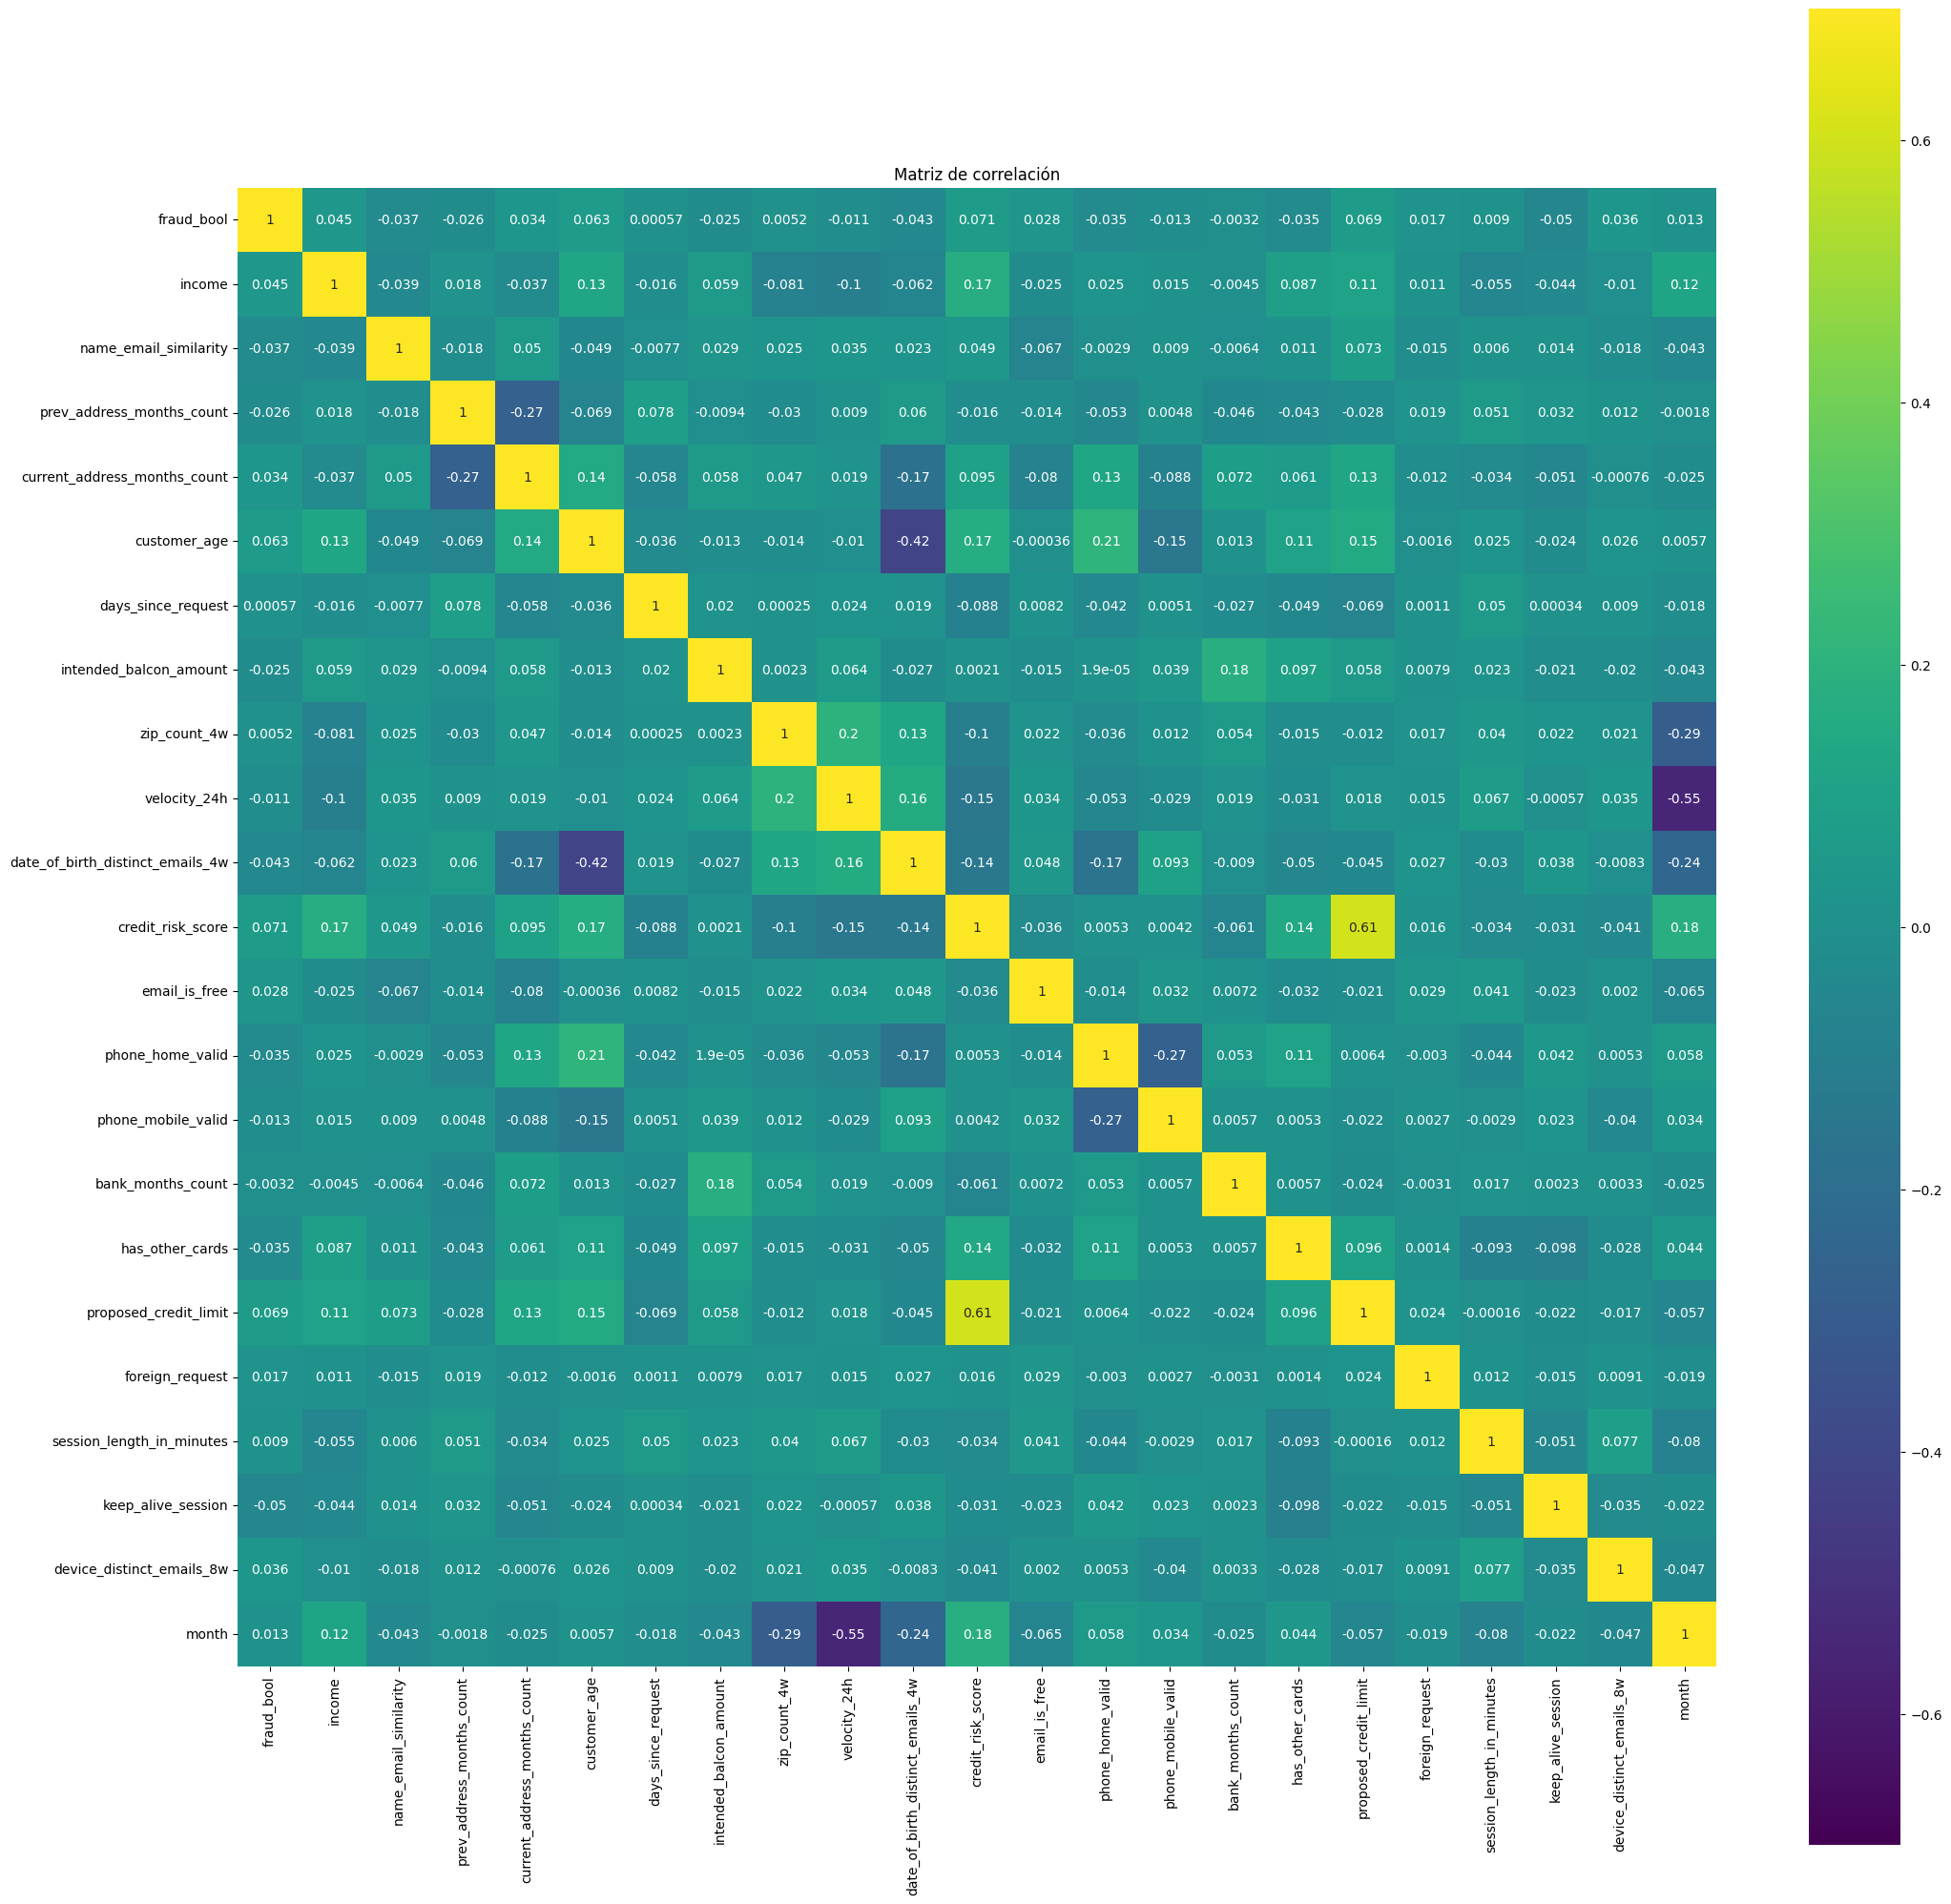

In [67]:
%matplotlib inline
#Matriz de corelacion matplotlib
correlation = data_sin_object.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(correlation,vmin=-0.7, vmax=0.7,square=True,annot=True,cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [69]:
models=[]
models.append(('LoR', LogisticRegression(solver='lbfgs')))
models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('K-NN', KNeighborsClassifier(n_neighbors=10)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVC', SVC(gamma='auto', C=2.0, kernel='linear')))

#Evaluamos cada modelo
results = []
names = []
scoring = 'accuracy'

for name,model in models:
    kfold = KFold(random_state=123,shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")


LoR: 98.90% (0.01%)
LDA: 98.81% (0.01%)
CART: 97.74% (0.03%)
NB: 89.57% (0.08%)
RF: 98.90% (0.02%)


In [70]:
results
names

['LoR', 'LDA', 'CART', 'NB', 'RF']

In [74]:
results.pop(2)
results

[array([0.989025, 0.988725, 0.989135, 0.98908 , 0.98889 ]),
 array([0.988325, 0.987905, 0.9881  , 0.98821 , 0.988155]),
 array([0.989045, 0.98872 , 0.98916 , 0.989075, 0.988905])]

In [75]:
names.pop(2)
names

['LoR', 'LDA', 'RF']

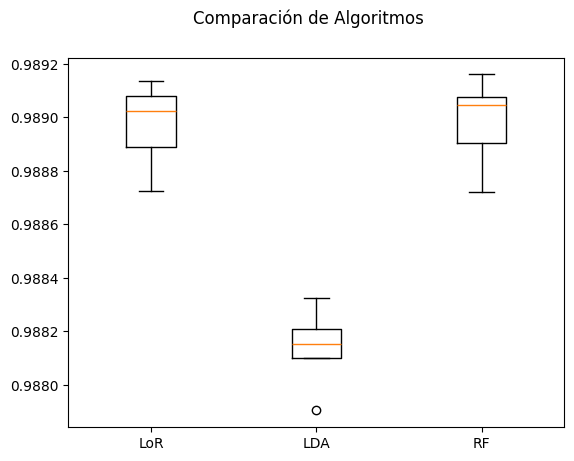

In [76]:
#Vamos a comparar los diferentes algoritmos en un diagrama d e cajas
fig = plt.figure()
fig.suptitle("Comparación de Algoritmos")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,shuffle=True)

print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (800000, 51)
Shape of X_test: (200000, 51)
Shape of y_train: (800000,)
Shape of y_test: (200000,)


In [119]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report
from imblearn.ensemble import BalancedRandomForestClassifier

In [120]:
model = BalancedRandomForestClassifier(n_estimators=10,random_state=0)

In [121]:
model.fit(X_train,y_train)
y_pred_rf = model.predict(X_test)

print("Training Accuracy:",model.score(X_train,y_train))
print("Test Accuracy:",model.score(X_test,y_test))

Training Accuracy: 0.82716625
Test Accuracy: 0.82192


In [122]:
# Predicciones probabilísticas
# ==============================================================================
# Con .predict_proba() se obtiene, para cada observación, la probabilidad predicha
# de pertenecer a cada una de las dos clases.
predicciones_proba = model.predict_proba(X = X_test)
predicciones_proba = pd.DataFrame(predicciones_proba, columns = model.classes_)
predicciones_proba.head(5)
clasificacion = np.where(predicciones_proba[1]<0.01, 0, 1)

In [123]:
from sklearn.metrics import classification_report
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

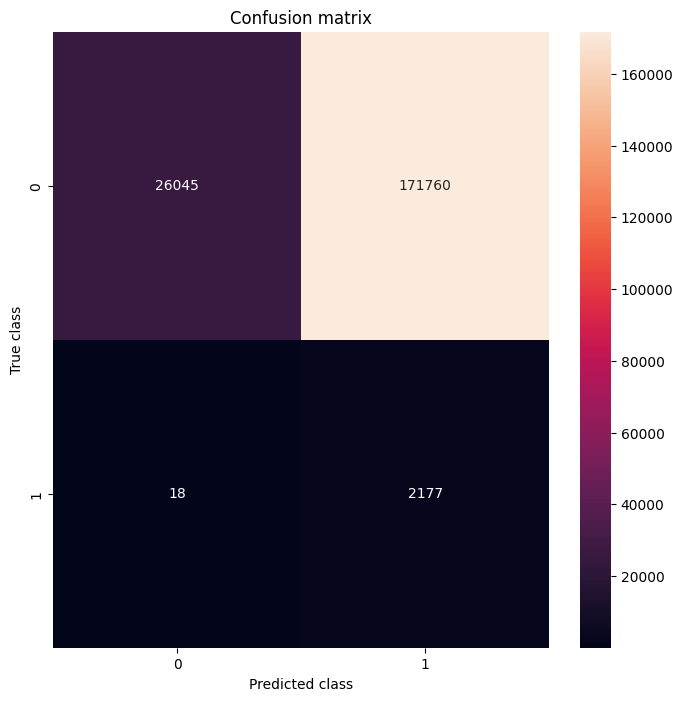

              precision    recall  f1-score   support

           0       1.00      0.13      0.23    197805
           1       0.01      0.99      0.02      2195

    accuracy                           0.14    200000
   macro avg       0.51      0.56      0.13    200000
weighted avg       0.99      0.14      0.23    200000



In [124]:
pred_y = model.predict(X_test)
mostrar_resultados(y_test, clasificacion)

confusion matrix of: {LogisticRegression()}


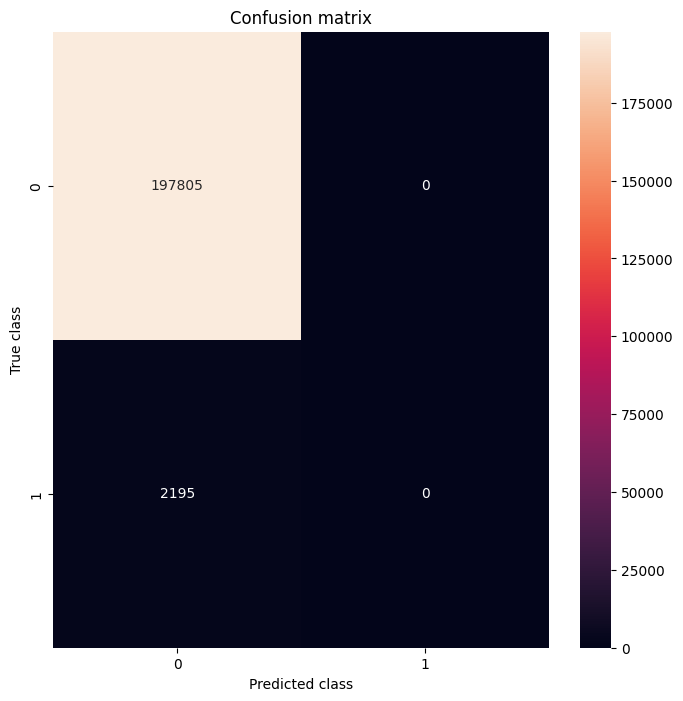

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197805
           1       0.00      0.00      0.00      2195

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000

confusion matrix of: {LinearDiscriminantAnalysis()}


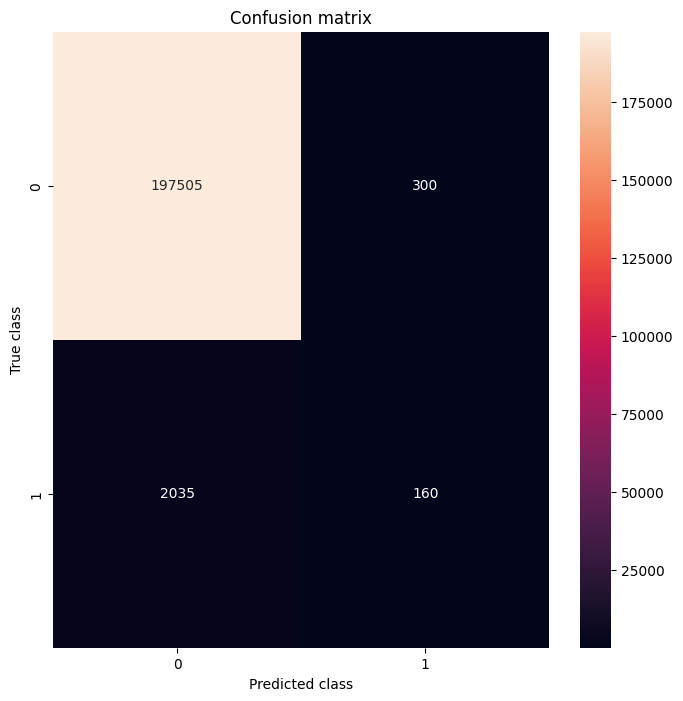

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197805
           1       0.35      0.07      0.12      2195

    accuracy                           0.99    200000
   macro avg       0.67      0.54      0.56    200000
weighted avg       0.98      0.99      0.98    200000

confusion matrix of: {RandomForestClassifier()}


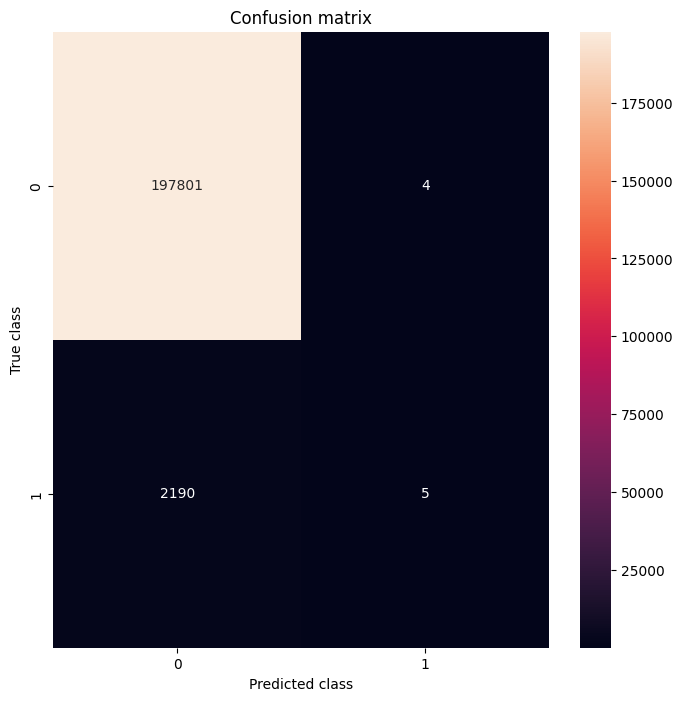

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197805
           1       0.56      0.00      0.00      2195

    accuracy                           0.99    200000
   macro avg       0.77      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000



In [125]:
for name,model in models:
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    print("confusion matrix of:",{model})
    mostrar_resultados(y_test, pred_y)

confusion matrix of: {LogisticRegression()}


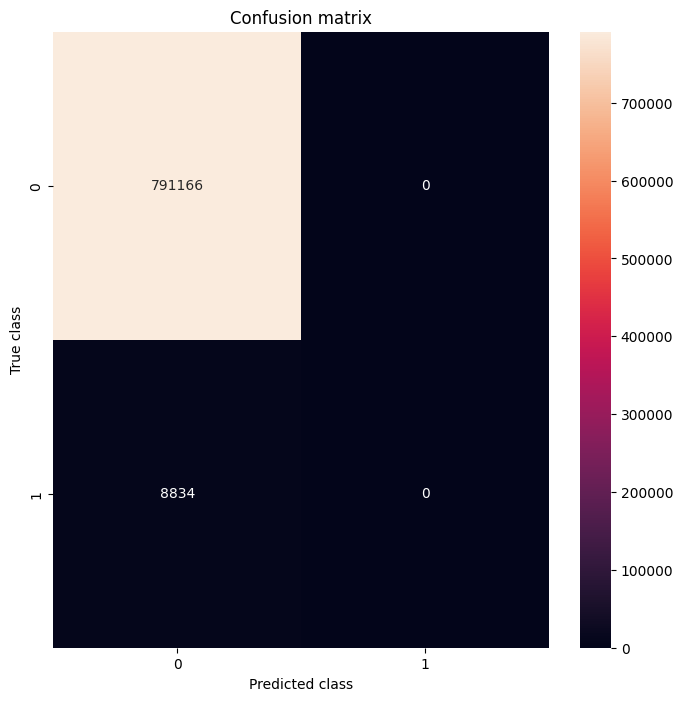

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    791166
           1       0.00      0.00      0.00      8834

    accuracy                           0.99    800000
   macro avg       0.49      0.50      0.50    800000
weighted avg       0.98      0.99      0.98    800000

confusion matrix of: {LinearDiscriminantAnalysis()}


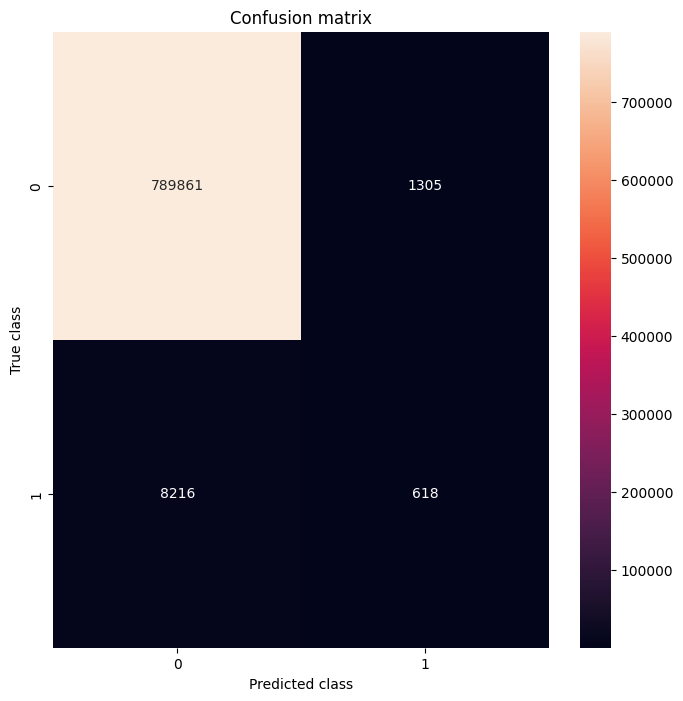

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    791166
           1       0.32      0.07      0.11      8834

    accuracy                           0.99    800000
   macro avg       0.66      0.53      0.55    800000
weighted avg       0.98      0.99      0.98    800000

confusion matrix of: {RandomForestClassifier()}


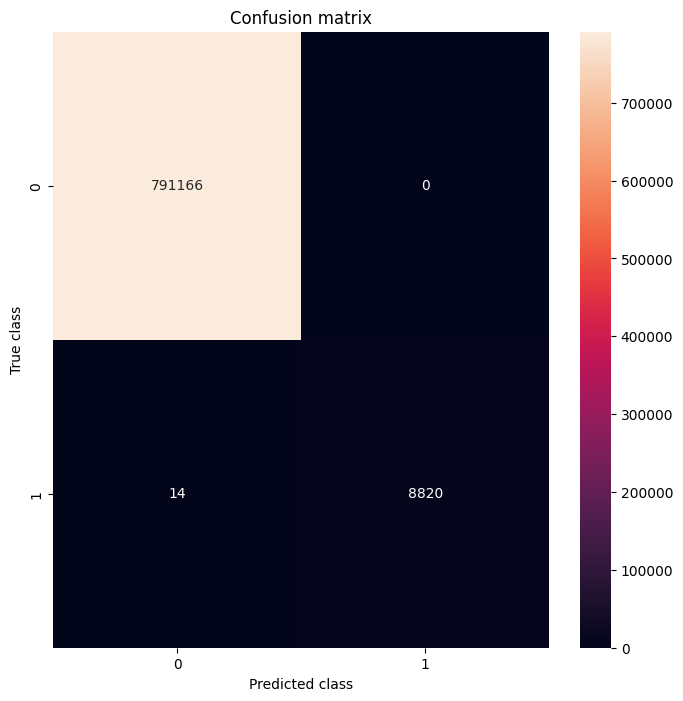

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    791166
           1       1.00      1.00      1.00      8834

    accuracy                           1.00    800000
   macro avg       1.00      1.00      1.00    800000
weighted avg       1.00      1.00      1.00    800000



In [127]:
for name,model in models:
    model.fit(X_train,y_train)
    pred_y = model.predict(X_train)
    print("confusion matrix of:",{model})
    mostrar_resultados(y_train, pred_y)

In [128]:
model

RandomForestClassifier()

In [130]:
# importo librería para guardar modelos
import pickle

In [132]:
# guardo modelo entrenado en formato pickle
with open('../models/random_forest.pkl', 'wb') as f:
    pickle.dump(model, f) # dump es la función para guardar el objeto model (rf entrenado)

In [133]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
random_forest = pickle.load(open('../models/random_forest.pkl','rb'))

In [134]:
# verifico que el objeto se cargó correctamente
random_forest 

RandomForestClassifier()

In [136]:
# verifico que funciona ok el predict
y_pred_rf = random_forest.predict(X_test)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
models[0][1]

LogisticRegression()

In [162]:
model1 = models[0][1]
model1.fit(X_train,y_train)

LogisticRegression()

In [149]:
# importo librería para guardar modelos
import pickle

In [153]:
# guardo modelo entrenado en formato pickle
with open('../models/LogisticRegression.pkl', 'wb') as f:
    pickle.dump(model1, f) # dump es la función para guardar el objeto model (LoR entrenado)

In [154]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
logistic_regression = pickle.load(open('../models/LogisticRegression.pkl','rb'))

In [155]:
# verifico que el objeto se cargó correctamente
logistic_regression 

LogisticRegression()

In [157]:
# verifico que funciona ok el predict
y_pred_lor = logistic_regression.predict(X_test)
y_pred_lor

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [160]:
model2 = models[1][1]
model2.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [163]:
# importo librería para guardar modelos
import pickle

In [164]:
# guardo modelo entrenado en formato pickle
with open('../models/LinearDiscriminantAnalisis.pkl', 'wb') as f:
    pickle.dump(model2, f) # dump es la función para guardar el objeto model (LDA entrenado)

In [166]:
# ahora importo el modelo guardado y lo guardo en el nuevo objeto random_forest
linear_discriminant_analysis = pickle.load(open('../models/LinearDiscriminantAnalisis.pkl','rb'))

In [167]:
# verifico que el objeto se cargó correctamente
linear_discriminant_analysis

LinearDiscriminantAnalysis()

In [168]:
# verifico que funciona ok el predict
y_pred_lda = linear_discriminant_analysis.predict(X_test)
y_pred_lda

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

seed=123
num_trees=10
kfold=KFold(random_state=seed,shuffle=True)
model= GradientBoostingClassifier(n_estimators=num_trees,random_state=seed)
results= cross_val_score(model,X,y,cv=kfold)
print(f"Accuracy: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")


Accuracy: 98.90% (0.02%)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

seed=123
num_trees=10
kfold=KFold(random_state=seed,shuffle=True)
model= AdaBoostClassifier(n_estimators=num_trees,random_state=seed)
results= cross_val_score(model,X,y,cv=kfold)
print(f"Accuracy: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

In [ ]:
from sklearn.metrics import classification_report

In [172]:
#Pruebas de casa
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=BalancedRandomForestClassifier(n_estimators=10,random_state=0)

In [173]:
model.fit(X_train,y_train)
y_pred_rf = model.predict(X_test)

print("Training Accuracy:", model.score(X_train,y_train))
print("Test Accuracy:", model.score(X_test,y_test))


Training Accuracy: 0.82716625
Test Accuracy: 0.82192


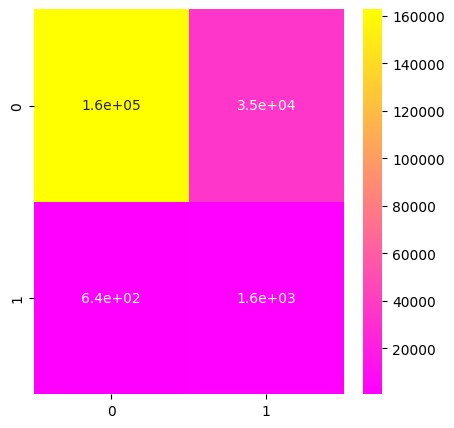

In [176]:
#Making Classificaion Report
cr = classification_report(y_test,y_pred_rf)

#Making a confusion matrix
plt.rcParams['figure.figsize']=(5,5)
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,cmap='spring')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=123)
X_sm,y_sm = sm.fit_resample(X_train,y_train)
                           
print(f"X antes de SMOTE:",{X_train.shape})
print(f"X despues de SMOTE:",{X_sm.shape})

In [183]:
print("Balance positivo y negativo de las clases:")
y_sm.value_counts(normalize=True)*100

Balance positivo y negativo de las clases:


fraud_bool
0    50.0
1    50.0
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Datos balanceados')

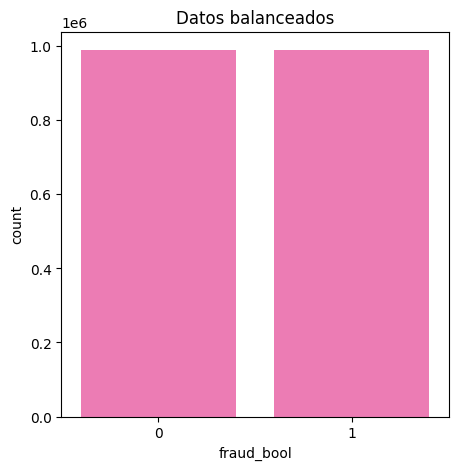

In [186]:
sns.countplot(x=y_sm,color="hotpink")
plt.title("Datos balanceados")

Accuracy = 0.99
Recall = 0.99



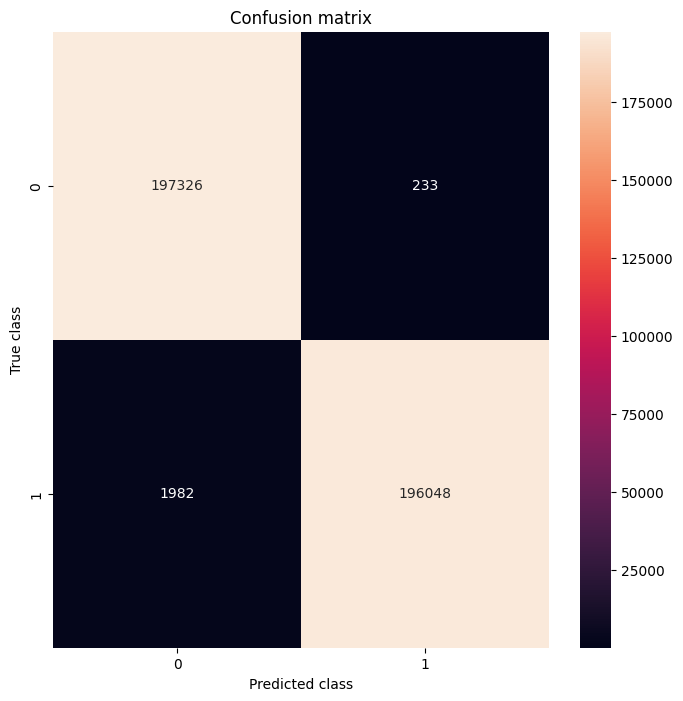

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197559
           1       1.00      0.99      0.99    198030

    accuracy                           0.99    395589
   macro avg       0.99      0.99      0.99    395589
weighted avg       0.99      0.99      0.99    395589



In [187]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=123,shuffle=True)

model_sm = RandomForestClassifier(random_state=123)
model_sm.fit(X_train,y_train)
predicts = model_sm.predict(X_test)
accuracy = accuracy_score(y_test, predicts)
recall = recall_score(y_test, predicts)
print(f'Accuracy = {accuracy:,.2f}\nRecall = {recall:,.2f}\n')
mostrar_resultados(y_test, predicts)

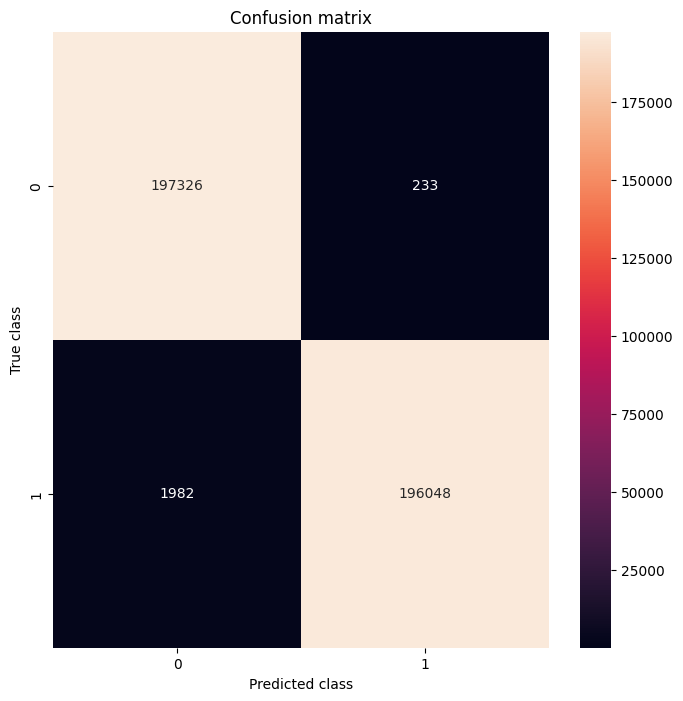

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197559
           1       1.00      0.99      0.99    198030

    accuracy                           0.99    395589
   macro avg       0.99      0.99      0.99    395589
weighted avg       0.99      0.99      0.99    395589



In [181]:
mostrar_resultados(y_test, predicts)